# Twitter Tim Cook Data Analysis

In [265]:
# Packages:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from urllib.request import urlopen
import json
import datetime
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [308]:
# Pulling CSV with Twitter information. Check tim_cook.ipynb for data extraction
columns_chosed = ['created_at','full_text','id','source','favorite_count','retweet_count']

timcook = pd.read_csv("data/timcook.csv")
timcook = timcook[columns_chosed]

In [344]:
# Filtering Dataframe for tweets since 2019
timcook["created_at"] = pd.to_datetime(timcook["created_at"]).dt.date
timcook["created_at"] = pd.to_datetime(timcook["created_at"])
timcook = timcook[timcook["created_at"]>='2019-01-01']
timcook_df1 = timcook.groupby("created_at").count().reset_index()
timcook_df1 = timcook_df1[["created_at",'full_text']]

timcook_df2 = timcook.groupby("created_at").sum().reset_index()
timcook_df2 = timcook_df2[['created_at','favorite_count','retweet_count']]
timcook_df2

timcook_df = timcook_df1.merge(timcook_df2,how='inner', on='created_at')
timcook_df = timcook_df.rename(columns={'full_text':'tweet_count'})
timcook_df

,created_at,tweet_count,favorite_count,retweet_count
0,2019-01-01,1,15664,2169
1,2019-01-16,1,13269,1750
2,2019-01-19,1,3940,439
3,2019-01-20,1,3487,551
4,2019-01-21,2,7054,1298
...,...,...,...,...
416,2021-11-20,1,5276,517
417,2021-11-22,1,6290,420
418,2021-11-23,1,7848,462
419,2021-11-25,1,8273,616


In [357]:
# Getting Data Stock prices. Source: Yahoo Finance.
apple_stock = pd.read_csv("data/AAPL.csv")
apple_stock_df = apple_stock[['Date','Close']]

# Calculating Stock Price Variation
apple_stock_df['var'] = apple_stock_df['Close']
# Approach 1:
# apple_stock_df['price_change'] = apple_stock_df['Close'].pct_change()
# Approach 2:
# for i in range(len(apple_stock_df)-1):
#     apple_stock_df['var'].iloc[i+1]= np.log(apple_stock_df['Close'].iloc[i]/apple_stock_df['Close'].iloc[i+1])
# Approach 3:
apple_stock_df['var']= (apple_stock_df['Close']/apple_stock_df['Close'].shift())

,Date,Close,var
0,2019-01-02,39.480000,NaN
1,2019-01-03,35.547501,0.900393
2,2019-01-04,37.064999,1.042689
3,2019-01-07,36.982498,0.997774
4,2019-01-08,37.687500,1.019063
...,...,...,...
730,2021-11-23,161.410004,1.002422
731,2021-11-24,161.940002,1.003284
732,2021-11-26,156.809998,0.968322
733,2021-11-29,160.240005,1.021874


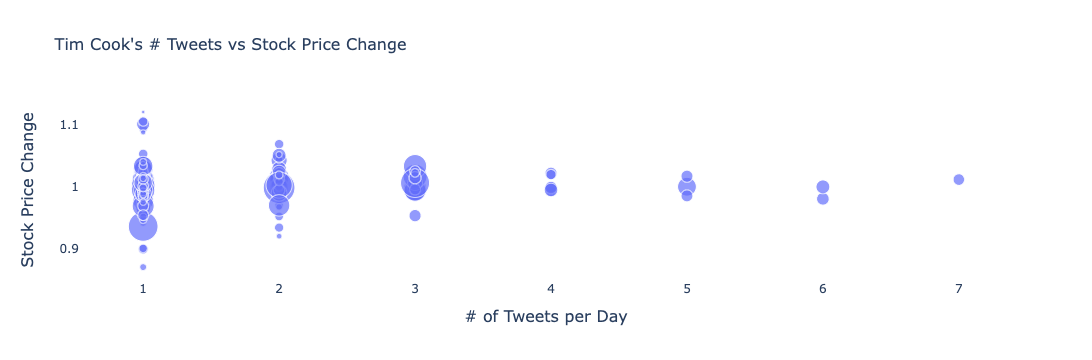

In [365]:
fig = go.Figure()
_ = fig.add_trace(go.Scatter(
    x= timcook_df['tweet_count'],
    y= apple_stock_df['var'],
    mode="markers",
    marker={"size": timcook_df['favorite_count'], "sizemode": "area",
                                    "sizeref": 2*max(timcook_df['favorite_count']/1000)},
    hovertemplate= "Number of Tweets per Day: %{x:.1f}<br>" +
    "Stock Price Change: %{y:.1f}<br>" +
    "Number of Likes: %{marker.size:,}" +
    "<extra></extra>"
))
fig.update_layout(
    plot_bgcolor="white",
    yaxis={"title": {"text": "Stock Price Change", "font": {"size": 16}}},
    xaxis={"title": {"text": "# of Tweets per Day", "font": {"size": 16}}},
    # hovermode="x",
    title={'text': "Tim Cook's # Tweets vs Stock Price Change", "font": {"size": 16}}
)
fig.show()

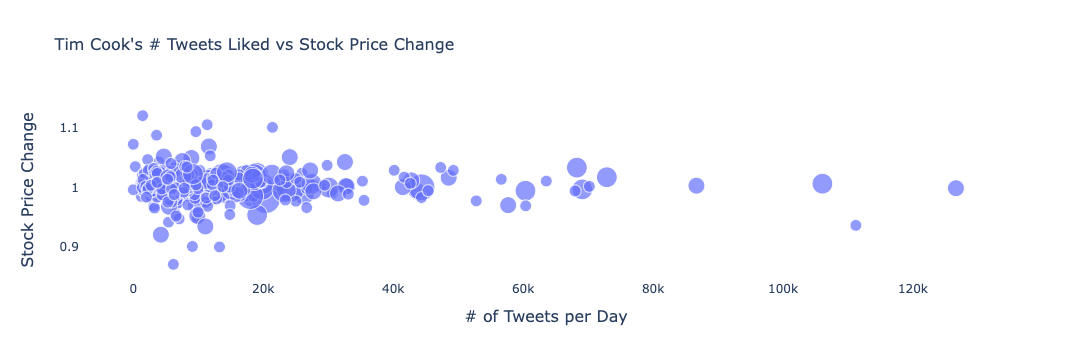

In [366]:
fig = go.Figure()
_ = fig.add_trace(go.Scatter(
    x= timcook_df['favorite_count'],
    y= apple_stock_df['var'],
    mode="markers",
    marker={"size": timcook_df['tweet_count'], "sizemode": "area",
                                    "sizeref": 2*max(timcook_df['tweet_count']/1000)},
    hovertemplate= "Number of Tweets Liked per Day: %{x:.1f}<br>" +
    "Stock Price Change: %{y:.1f}<br>" +
    "Number of Likes: %{marker.size:,}" +
    "<extra></extra>"
))
fig.update_layout(
    plot_bgcolor="white",
    yaxis={"title": {"text": "Stock Price Change", "font": {"size": 16}}},
    xaxis={"title": {"text": "# of Tweets Liked per Day", "font": {"size": 16}}},
    # hovermode="x",
    title={'text': "Tim Cook's # Tweets Liked vs Stock Price Change", "font": {"size": 16}}
)
fig.show()

## Sentimental Analysis

In [273]:
import re

# Clean The Data
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    
    return text

In [358]:
# Clean The Text
timcook['full_text'] = timcook['full_text'].apply(cleantext)
timcook.head()

,created_at,full_text,id,source,favorite_count,retweet_count
0,2021-11-28,Happy Hanukkah! I wish all those who are celeb...,1465050134274785282,"<a href=""http://twitter.com/download/iphone"" r...",5800,373
1,2021-11-25,"Togetherness is a gift. This Thanksgiving, I’m...",1463909273482641411,"<a href=""http://twitter.com/download/iphone"" r...",8273,616
2,2021-11-23,Great to see the magic of Apple products at wo...,1463236596505841665,"<a href=""http://twitter.com/download/iphone"" r...",7848,462
3,2021-11-22,Our reimagined Apple Store at The Grove brings...,1462594258158833671,"<a href=""http://twitter.com/download/iphone"" r...",6290,420
4,2021-11-20,"This Transgender Day of Remembrance, I stand i...",1462159843461005313,"<a href=""http://twitter.com/download/iphone"" r...",5276,517


In [359]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds['full_text']).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
timcook[["subjectivity", "polarity"]] = timcook.apply(sentiment_analysis, axis=1)

In [360]:
#Polarity Change
timcook["polarity_chg"] = timcook["polarity"]
for i in range(len(timcook)-1):
    timcook["polarity_chg"].iloc[i]= np.log(timcook["polarity"].iloc[i]/timcook["polarity"].iloc[i+1])

,created_at,full_text,id,source,favorite_count,retweet_count,subjectivity,polarity,polarity_chg
0,2021-11-28,Happy Hanukkah! I wish all those who are celeb...,1465050134274785282,"<a href=""http://twitter.com/download/iphone"" r...",5800,373,0.614286,0.646429,0.665898
1,2021-11-25,"Togetherness is a gift. This Thanksgiving, I’m...",1463909273482641411,"<a href=""http://twitter.com/download/iphone"" r...",8273,616,0.644048,0.332143,-0.185899
2,2021-11-23,Great to see the magic of Apple products at wo...,1463236596505841665,"<a href=""http://twitter.com/download/iphone"" r...",7848,462,0.625000,0.400000,-0.916291
3,2021-11-22,Our reimagined Apple Store at The Grove brings...,1462594258158833671,"<a href=""http://twitter.com/download/iphone"" r...",6290,420,0.525000,1.000000,1.003302
4,2021-11-20,"This Transgender Day of Remembrance, I stand i...",1462159843461005313,"<a href=""http://twitter.com/download/iphone"" r...",5276,517,0.666667,0.366667,-0.576880
...,...,...,...,...,...,...,...,...,...
575,2019-01-21,"On MLKDay, let us remember our own duty to do ...",1087361909223940098,"<a href=""http://twitter.com/download/iphone"" r...",5397,1087,0.557576,0.221212,NaN
576,2019-01-20,Game changer! iPad Pro helping coaches make f...,1086812538103185409,"<a href=""http://twitter.com/#!/download/ipad"" ...",3487,551,0.400000,-0.500000,NaN
577,2019-01-19,Thanks to Dorsa Elementary students and all wh...,1086717034484817920,"<a href=""http://twitter.com/#!/download/ipad"" ...",3940,439,0.520000,0.342273,-0.196679
578,2019-01-16,"Glad to hear your husband is feeling better, E...",1085367555751985152,"<a href=""http://twitter.com/download/iphone"" r...",13269,1750,0.566667,0.416667,NaN


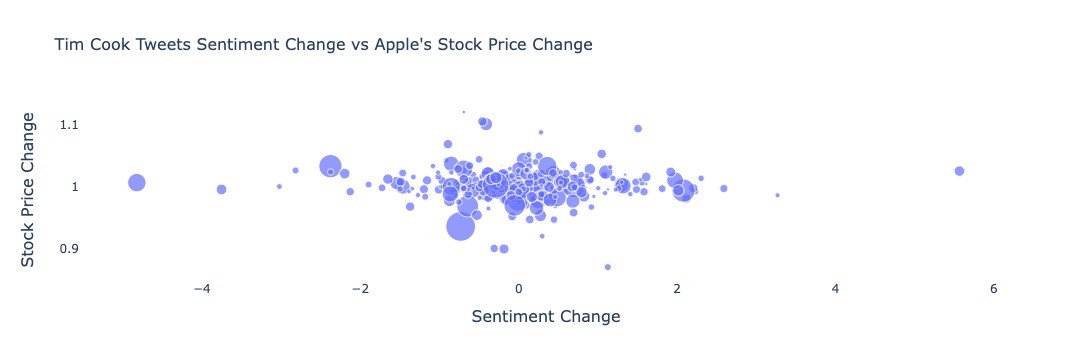

In [364]:
fig = go.Figure()
_ = fig.add_trace(go.Scatter(
    x= timcook["polarity_chg"],
    y= apple_stock_df['var'],
    mode="markers",
    marker={"size": timcook_df['favorite_count'], "sizemode": "area",
                                    "sizeref": 2*max(timcook_df['favorite_count']/1000)},
    hovertemplate= "Polarity of Tweets: %{x:.1f}<br>" +
    "Stock Price Change: %{y:.1f}<br>" +
    "Number of Likes: %{marker.size:,}" +
    "<extra></extra>"
))
fig.update_layout(
    plot_bgcolor="white",
    # hovermode="x",
    xaxis={"title": {"text": "Sentiment Change", "font": {"size": 16}}},
    yaxis={"title": {"text": "Stock Price Change", "font": {"size": 16}}},
    title={'text': "Tim Cook Tweets Sentiment Change vs Apple's Stock Price Change", "font": {"size": 16}}
)
fig.show()

## Word Clound

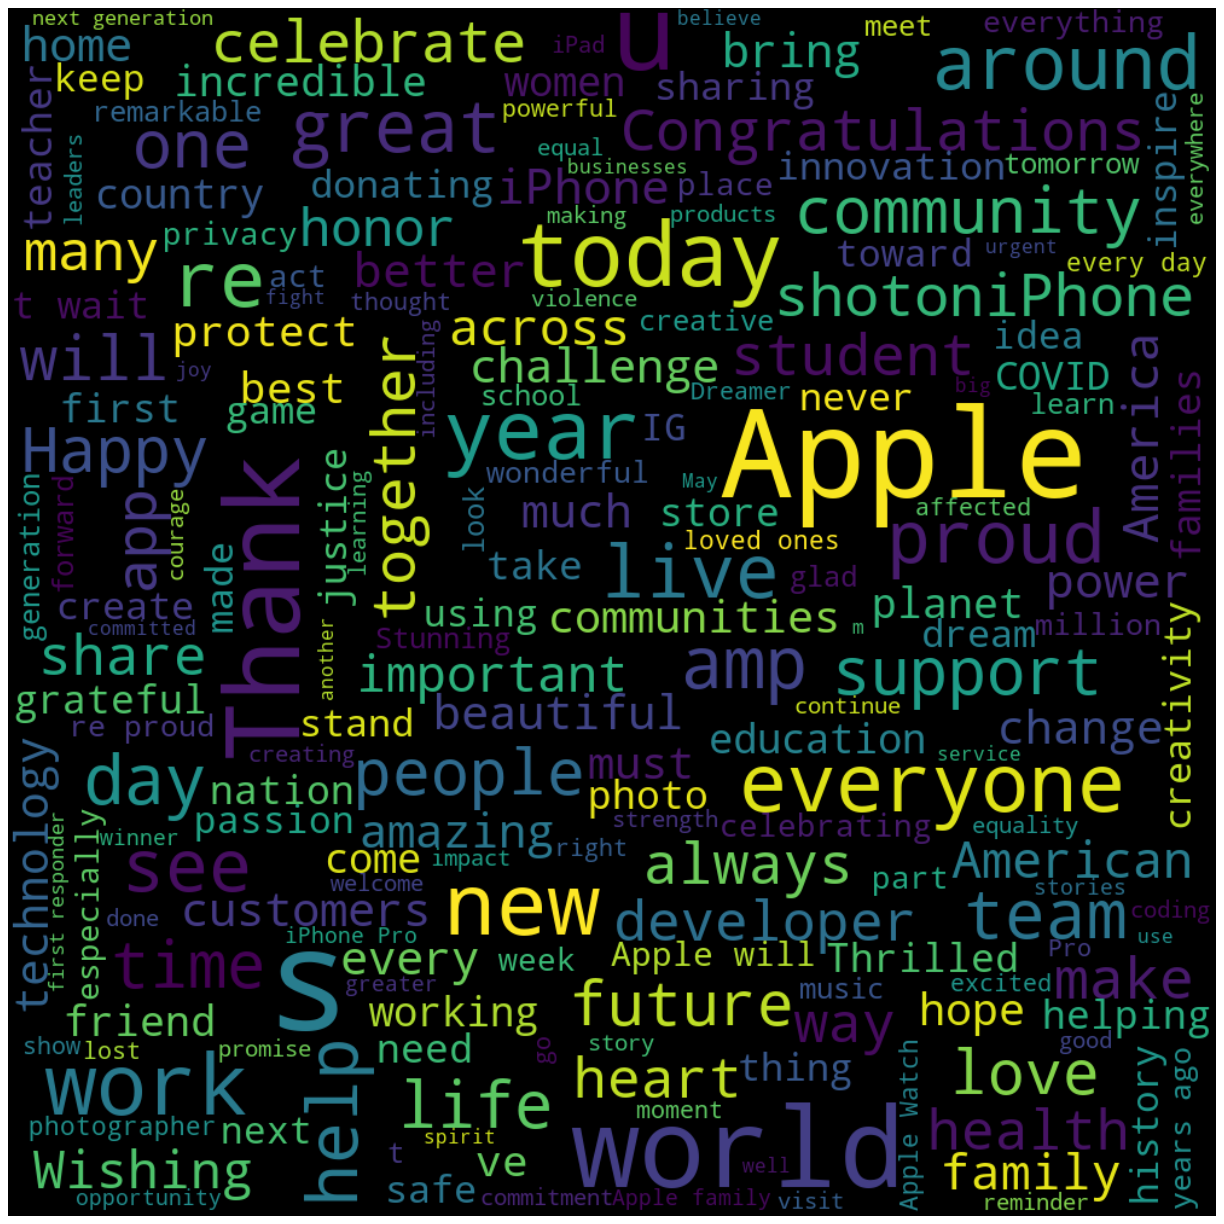

In [278]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
allwords = " ".join([twts for twts in timcook['full_text']])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()